## 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))

In [4]:
X[:,0] = np.random.uniform(0.,100.,size=100)

In [6]:
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0.,10.,size=100)

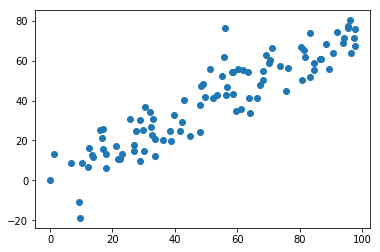

In [8]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### demean

In [9]:
def demean(X):
    return X - np.mean(X,axis=0)

In [10]:
X_deman = demean(X)

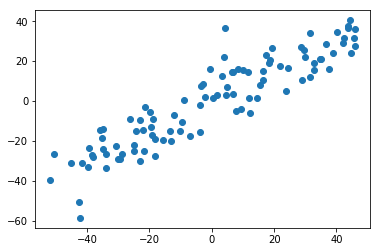

In [11]:
plt.scatter(X_deman[:,0],X_deman[:,1])

### 梯度上升法

In [12]:
def f(w,X):
    return np.sum((X.dot(w) ** 2)) / len(X)

In [13]:
def df_math(w,X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [16]:
def df_debug(w,X,epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1,X) - f(w-2,X)) / (2 * epsilon)
    return res

In [29]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df,X,initial_w,eta,n_iters = 1e4,epsilon = 1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w,X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w,X) - f(last_w,X)) < epsilon):
            break
        
        cur_iter += 1
    
    return w

In [31]:
initial_w = np.random.random(X.shape[1])
initial_w

array([0.72441593, 0.91189128])

In [27]:
eta = 0.001

In [30]:
gradient_ascent(df_debug,X_deman,initial_w,eta)

array([-0.70710757, -0.707106  ])

In [35]:
w = gradient_ascent(df_math,X_deman,initial_w,eta)

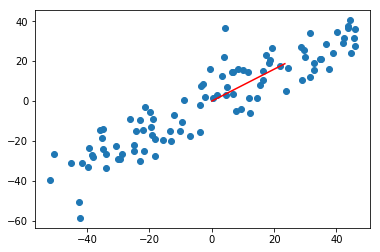

In [36]:
plt.scatter(X_deman[:,0],X_deman[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],color='r')